<a href="https://colab.research.google.com/github/arfild/dw_matrix_road_sign/blob/master/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score


%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [22]:
cd'/content/drive/My Drive/Colab Notebook/matrix/matrix_tree/dw_matrix_road_sign/data'

/content/drive/My Drive/Colab Notebook/matrix/matrix_tree/dw_matrix_road_sign/data


In [0]:
train = pd.read_pickle('train.p')
test = pd.read_pickle('test.p')

x_train, y_train  = train['features'], train['labels']
x_test, y_test  = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [26]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train)

1088/1088 [==============================] - 4s 4ms/step - loss: 5.3686 - accuracy: 0.7890


In [0]:
def get_cnn_v1(input_shape, num_classes):
 return Sequential([
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    
    Flatten(),
    
    Dense(num_classes, activation='softmax'),
 ])

def train_model(model, x_train, y_train, params_fit={}):
  
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(
      x_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (x_train, y_train)),
      callbacks=[tensorboard_callback]
  )

  return model

In [29]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, x_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 27.6533 - accuracy: 0.7607 - val_loss: 0.2706 - val_accuracy: 0.9440
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2017 - accuracy: 0.9550 - val_loss: 0.1474 - val_accuracy: 0.9625
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1152 - accuracy: 0.9735 - val_loss: 0.0964 - val_accuracy: 0.9778
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0991 - accuracy: 0.9772 - val_loss: 0.0579 - val_accuracy: 0.9856
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0890 - accuracy: 0.9793 - val_loss: 0.0579 - val_accuracy: 0.9868


In [0]:
df = pd.read_csv('signnames.csv')
labels_dict = df.to_dict()['b']

In [32]:
y_pred_prob = model_trained.predict(x_test)
y_pred_prob

array([[2.7013464e-11, 3.7821141e-04, 2.6212970e-03, ..., 2.8623115e-06,
        1.4519406e-02, 1.4133522e-05],
       [3.8981693e-09, 5.7810565e-05, 4.4718515e-03, ..., 2.4061262e-06,
        2.1435058e-05, 9.8305918e-08],
       [2.3049116e-11, 7.3015579e-04, 1.3316624e-03, ..., 8.1734815e-06,
        1.6639072e-01, 1.7942177e-04],
       ...,
       [6.0127531e-03, 1.0850756e-02, 8.2968809e-03, ..., 1.5570928e-03,
        5.9478311e-03, 1.4938677e-03],
       [8.6559057e-03, 8.8425484e-03, 6.4844918e-03, ..., 4.0273420e-03,
        8.4084058e-03, 7.3379127e-04],
       [1.9929758e-03, 2.8970139e-03, 2.2818756e-03, ..., 1.3457758e-03,
        7.7311927e-03, 5.7647354e-04]], dtype=float32)

In [33]:

y_pred_prob[400]

array([1.7231736e-08, 9.9994612e-01, 1.8300419e-08, 1.8574973e-07,
       5.3598545e-05, 5.0088972e-10, 3.9391918e-29, 2.9953405e-13,
       1.7933772e-18, 8.1409340e-10, 1.1170163e-13, 7.4877415e-22,
       1.2316337e-18, 5.4016005e-21, 3.6674206e-28, 2.6330080e-09,
       3.2517874e-18, 1.8123191e-31, 2.2937477e-25, 0.0000000e+00,
       1.0440709e-32, 2.8210639e-20, 8.2725960e-31, 1.3499357e-28,
       1.3970276e-29, 1.6867610e-25, 6.0599364e-24, 2.4806490e-28,
       8.3572681e-20, 1.3294630e-21, 5.5870167e-33, 8.1475234e-28,
       2.1830738e-24, 6.1821272e-30, 0.0000000e+00, 9.4748792e-25,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.9381052e-32, 3.9358748e-35, 9.7333147e-22], dtype=float32)

In [34]:
np.argmax( y_pred_prob[400] )

1

<BarContainer object of 43 artists>

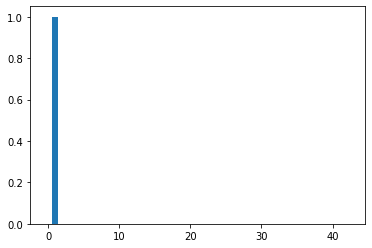

In [35]:
plt.bar(range(43), y_pred_prob[400])

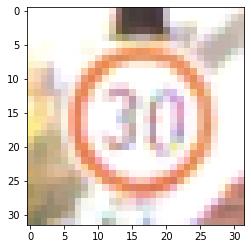

In [36]:
plt.imshow(x_test[400])

In [0]:
def predict(model_trained, x_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test,axis=1)
  y_pred_prob = model_trained.predict(x_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  return scoring(y_test_norm, y_pred)

In [38]:
predict(model_trained, x_test, y_test)

0.8136054421768707

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, x_train, y_train)
  return predict(model_trained, x_test, y_test)

In [40]:
def get_cnn_v2(input_shape, num_classes):
 return Sequential([
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v2(input_shape, num_classes))

ERROR! Session/line number was not unique in database. History logging moved to new session 68
Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 7.2486 - accuracy: 0.1789 - val_loss: 2.0442 - val_accuracy: 0.4554
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.8571 - accuracy: 0.4656 - val_loss: 1.1410 - val_accuracy: 0.6740
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 1.1194 - accuracy: 0.6588 - val_loss: 0.5317 - val_accuracy: 0.8604
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.6445 - accuracy: 0.8027 - val_loss: 0.2106 - val_accuracy: 0.9550
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.4371 - accuracy: 0.8656 - val_loss: 0.1425 - val_accuracy: 0.9697


0.8786848072562359

In [41]:
def get_cnn_v3(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.2148 - accuracy: 0.5661 - val_loss: 0.2321 - val_accuracy: 0.9419
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3691 - accuracy: 0.8949 - val_loss: 0.0644 - val_accuracy: 0.9854
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2072 - accuracy: 0.9405 - val_loss: 0.0312 - val_accuracy: 0.9924
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1415 - accuracy: 0.9590 - val_loss: 0.0197 - val_accuracy: 0.9956
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1130 - accuracy: 0.9674 - val_loss: 0.0130 - val_accuracy: 0.9971


0.98140589569161

In [42]:
def get_cnn_v4(input_shape, num_classes):
 return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])
get_cnn_v4(input_shape, num_classes).summary()
train_and_predict( get_cnn_v4(input_shape, num_classes))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

0.9634920634920635

In [44]:
 def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
 ])

train_and_predict( get_cnn_v5(input_shape, num_classes))

ERROR! Session/line number was not unique in database. History logging moved to new session 69
Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.5851 - accuracy: 0.3093 - val_loss: 0.9087 - val_accuracy: 0.7324
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.8706 - accuracy: 0.7223 - val_loss: 0.2571 - val_accuracy: 0.9183
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4367 - accuracy: 0.8643 - val_loss: 0.1306 - val_accuracy: 0.9614
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2718 - accuracy: 0.9180 - val_loss: 0.0522 - val_accuracy: 0.9867
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2134 - accuracy: 0.9364 - val_loss: 0.0445 - val_accuracy: 0.9878


0.9648526077097506

In [45]:
x_train[0].shape

(32, 32, 3)

In [46]:
color.rgb2gray(x_train[0]).shape

(32, 32)

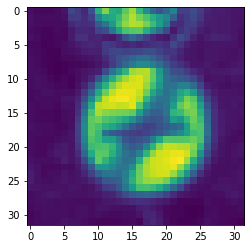

In [47]:
plt.imshow(color.rgb2gray(x_train[0]))

In [0]:
x_train_gray = color.rgb2gray(x_train).reshape(-1,32,32,1)
x_test_gray = color.rgb2gray(x_test).reshape(-1,32,32,1)

In [49]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, x_train_gray, y_train, params_fit={})
predict(model_trained,x_test_gray,y_test)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.6582 - accuracy: 0.2610 - val_loss: 0.6526 - val_accuracy: 0.7904
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.5426 - accuracy: 0.8277 - val_loss: 0.1195 - val_accuracy: 0.9629
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2458 - accuracy: 0.9211 - val_loss: 0.0582 - val_accuracy: 0.9856
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1596 - accuracy: 0.9505 - val_loss: 0.0325 - val_accuracy: 0.9908
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1201 - accuracy: 0.9631 - val_loss: 0.0332 - val_accuracy: 0.9903


0.9702947845804989

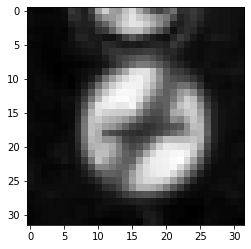

In [50]:
plt.imshow(color.rgb2gray(x_train[0]),cmap=plt.get_cmap('gray'))